In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# RBF: all features

Import results file

In [3]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

RBF = pd.read_csv('result_rbf_SP.csv', names= colnames)

Calculate evaluation metrics

In [4]:
RBF['accuracy'] = (RBF.tp+RBF.tn)/(RBF.tp+RBF.tn+RBF.fp+RBF.fn)
RBF['jaccard'] = RBF.tp/(RBF.tp+RBF.fp + RBF.fn)
RBF['precision'] = RBF.tp/(RBF.tp+RBF.fp)
RBF['recall'] = RBF.tp/(RBF.tp+RBF.fn)
RBF['specificity'] = RBF.tn/(RBF.tn+RBF.fp)

Aggregate the metrics

In [5]:
RBF_agg = RBF.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [6]:
['_'.join(col) for col in RBF_agg.columns.values]

RBF_agg.columns  = ['_'.join(col) for col in RBF_agg.columns.values]
RBF_agg.reset_index(inplace=True)

In [7]:
RBF_agg

,scene,N,accuracy_mean,accuracy_std,jaccard_mean,jaccard_std,precision_mean,precision_std,recall_mean,recall_std,specificity_mean,specificity_std
0,LC08_L1TP_003052_20160120_20170405_01_T1,10,0.780002,0.072358,0.413702,0.160627,0.913926,0.178940,0.475795,0.231654,0.933042,0.154919
1,LC08_L1TP_003052_20160120_20170405_01_T1,20,0.698648,0.105539,0.396612,0.079844,0.688118,0.277829,0.572726,0.165183,0.761997,0.219655
2,LC08_L1TP_003052_20160120_20170405_01_T1,40,0.749241,0.100263,0.466252,0.120377,0.757985,0.256290,0.633930,0.212963,0.807252,0.215458
3,LC08_L1TP_003052_20160120_20170405_01_T1,80,0.751639,0.107697,0.486714,0.110528,0.746279,0.253037,0.663943,0.186369,0.795756,0.220868
4,LC08_L1TP_003052_20160120_20170405_01_T1,160,0.848555,0.069895,0.595754,0.098659,0.931401,0.152860,0.636773,0.100279,0.955098,0.117997
...,...,...,...,...,...,...,...,...,...,...,...,...
155,LC08_L1TP_066014_20160520_20170223_01_T1,80,0.993795,0.012695,0.988762,0.023012,0.998482,0.001366,0.990271,0.023424,0.998133,0.001685
156,LC08_L1TP_066014_20160520_20170223_01_T1,160,0.996891,0.001646,0.994371,0.002980,0.998807,0.000981,0.995555,0.003199,0.998534,0.001208
157,LC08_L1TP_066014_20160520_20170223_01_T1,320,0.997010,0.000854,0.994589,0.001537,0.998563,0.001745,0.996017,0.001711,0.998231,0.002155
158,LC08_L1TP_066014_20160520_20170223_01_T1,640,0.997106,0.000353,0.994759,0.000639,0.999144,0.000765,0.995609,0.001012,0.998949,0.000941


Aggregate wrt N

In [8]:
RBF_N = RBF_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_1837/2805215620.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RBF_N = RBF_agg.groupby('N').agg('mean')


In [9]:
RBF_N[['accuracy_mean', 'accuracy_std', 'jaccard_mean', 'jaccard_std', 'precision_mean', 'recall_mean', 'specificity_mean']]

,accuracy_mean,accuracy_std,jaccard_mean,jaccard_std,precision_mean,recall_mean,specificity_mean
N,,,,,,,
10,0.830458,0.109488,0.495985,0.137302,0.675276,0.676522,0.890598
20,0.856165,0.082719,0.531865,0.107079,0.657789,0.716948,0.895087
40,0.869756,0.067534,0.550395,0.087461,0.668773,0.727926,0.904734
80,0.898930,0.046371,0.594443,0.082310,0.709605,0.745214,0.932783
160,0.908750,0.034611,0.608826,0.067547,0.723909,0.760301,0.946463
320,0.922182,0.019020,0.636580,0.053211,0.754733,0.766223,0.959888
640,0.927550,0.014483,0.651135,0.048254,0.773913,0.766757,0.965593
1280,0.930879,0.010329,0.658612,0.031997,0.787260,0.760236,0.972161


Plot the mean overall accuracy

<AxesSubplot: xlabel='N'>

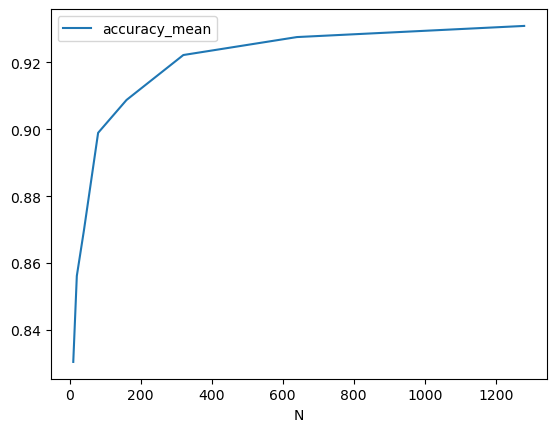

In [11]:
RBF_N.reset_index(inplace=True)
RBF_N.plot('N', 'accuracy_mean')

# Linear Full

Import results file

In [12]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'timestamp', 'scene']

lin = pd.read_csv('result_linear_SP.csv', names= colnames)

Calculate evaluation metrics

In [13]:
lin['accuracy'] = (lin.tp+lin.tn)/(lin.tp+lin.tn+lin.fp+lin.fn)
lin['jaccard'] = lin.tp/(lin.tp+lin.fp + lin.fn)
lin['precision'] = lin.tp/(lin.tp+lin.fp)
lin['recall'] = lin.tp/(lin.tp+lin.fn)
lin['specificity'] = lin.tn/(lin.tn+lin.fp)

Aggregate the metrics

In [14]:
lin_agg = lin.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [15]:
['_'.join(col) for col in lin_agg.columns.values]

lin_agg.columns  = ['_'.join(col) for col in lin_agg.columns.values]
lin_agg.reset_index(inplace=True)

Aggregate wrt N

In [16]:
lin_N = lin_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_1837/3553675179.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lin_N = lin_agg.groupby('N').agg('mean')


In [17]:
lin_N[['accuracy_mean', 'jaccard_mean', 'precision_mean', 'recall_mean', 'specificity_mean']]

,accuracy_mean,jaccard_mean,precision_mean,recall_mean,specificity_mean
N,,,,,
10,0.826433,0.486129,0.691895,0.651675,0.895518
20,0.832766,0.509467,0.668072,0.702425,0.882430
40,0.823576,0.487450,0.671881,0.666012,0.883461
80,0.845683,0.524598,0.674634,0.706366,0.892359
160,0.832981,0.521993,0.637519,0.740371,0.856800
320,0.859003,0.533864,0.655879,0.756105,0.899558
640,0.856352,0.537397,0.648946,0.774936,0.891755
1280,0.869072,0.539394,0.664827,0.772169,0.912376


Plot the mean overall accuracy

<AxesSubplot: xlabel='N'>

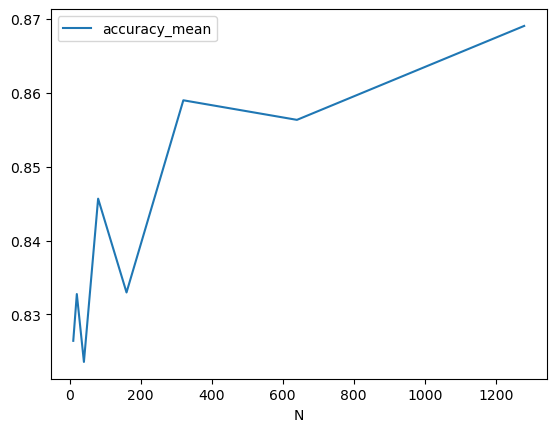

In [18]:
lin_N.reset_index(inplace=True)
lin_N.plot('N', 'accuracy_mean')

# Lin: 4 PCs

Import results file

In [19]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'timestamp', 'scene']

lin4 = pd.read_csv('result_linear_SP_pca4.csv', names= colnames)

Calculate evaluation metrics

In [20]:
lin4['accuracy'] = (lin4.tp+lin4.tn)/(lin4.tp+lin4.tn+lin4.fp+lin4.fn)
lin4['jaccard'] = lin4.tp/(lin4.tp+lin4.fp + lin4.fn)
lin4['precision'] = lin4.tp/(lin4.tp+lin4.fp)
lin4['recall'] = lin4.tp/(lin4.tp+lin4.fn)
lin4['specificity'] = lin4.tn/(lin4.tn+lin4.fp)

Aggregate the metrics

In [23]:
lin4_agg = lin4.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [24]:
['_'.join(col) for col in lin4_agg.columns.values]

lin4_agg.columns  = ['_'.join(col) for col in lin4_agg.columns.values]
lin4_agg.reset_index(inplace=True)

Aggregate wrt N

In [25]:
lin4_N = lin4_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_1837/1371705044.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lin4_N = lin4_agg.groupby('N').agg('mean')


In [26]:
lin4_N[['accuracy_mean', 'accuracy_std', 'jaccard_mean', 'precision_mean', 'recall_mean', 'specificity_mean']]

,accuracy_mean,accuracy_std,jaccard_mean,precision_mean,recall_mean,specificity_mean
N,,,,,,
10,0.825062,0.102530,0.488916,0.685335,0.663302,0.888376
20,0.842883,0.074219,0.498943,0.691639,0.658596,0.910258
40,0.841087,0.072161,0.477704,0.703008,0.608797,0.919234
80,0.861144,0.046725,0.492514,0.732031,0.598354,0.943300
160,0.860003,0.051146,0.484202,0.727006,0.585539,0.943297
320,0.863390,0.023682,0.477813,0.775323,0.554866,0.959107
640,0.866169,0.013505,0.473383,0.754468,0.542381,0.963337
1280,0.866798,0.007076,0.475214,0.792820,0.544186,0.963676


Plot the mean overall accuracy

<AxesSubplot: xlabel='N'>

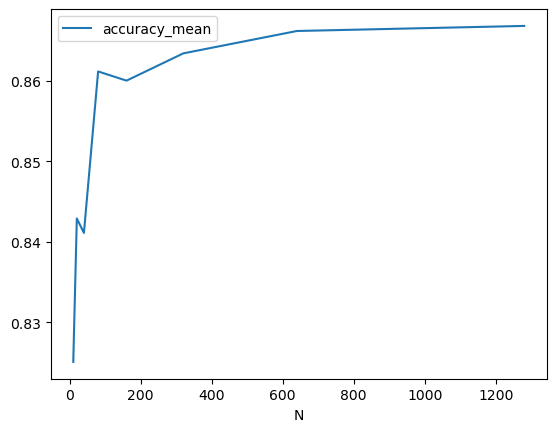

In [28]:
lin4_N.reset_index(inplace=True)
lin4_N.plot('N', 'accuracy_mean')

# RBF: 4 PCs

Import results file

In [29]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

RBF4 = pd.read_csv('result_rbf_SP_pca4.csv', names= colnames)

Calculate evaluation metrics

In [30]:
RBF4['accuracy'] = (RBF4.tp+RBF4.tn)/(RBF4.tp+RBF4.tn+RBF4.fp+RBF4.fn)
RBF4['jaccard'] = RBF4.tp/(RBF4.tp+RBF4.fp + RBF4.fn)
RBF4['precision'] = RBF4.tp/(RBF4.tp+RBF4.fp)
RBF4['recall'] = RBF4.tp/(RBF4.tp+RBF4.fn)
RBF4['specificity'] = RBF4.tn/(RBF4.tn+RBF4.fp)

Aggregate the metrics

In [34]:
RBF4_agg = RBF4.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [35]:
RBF4_agg.columns  = ['_'.join(col) for col in RBF4_agg.columns.values]
RBF4_agg.reset_index(inplace=True)

In [36]:
RBF4_agg

,scene,N,accuracy_mean,accuracy_std,jaccard_mean,jaccard_std,precision_mean,precision_std,recall_mean,recall_std,specificity_mean,specificity_std
0,LC08_L1TP_003052_20160120_20170405_01_T1,10,0.745016,0.127705,0.426749,0.154519,0.820179,0.237284,0.569896,0.279742,0.833115,0.274510
1,LC08_L1TP_003052_20160120_20170405_01_T1,20,0.743635,0.087058,0.429538,0.100471,0.777723,0.250784,0.579264,0.220447,0.826327,0.210723
2,LC08_L1TP_003052_20160120_20170405_01_T1,40,0.757898,0.093669,0.433370,0.100048,0.822610,0.245945,0.543725,0.200048,0.865644,0.204757
3,LC08_L1TP_003052_20160120_20170405_01_T1,80,0.762915,0.091077,0.465411,0.072132,0.804768,0.245497,0.598245,0.173082,0.845757,0.207475
4,LC08_L1TP_003052_20160120_20170405_01_T1,160,0.798637,0.081310,0.472257,0.120026,0.912419,0.193860,0.519815,0.141990,0.938906,0.144859
...,...,...,...,...,...,...,...,...,...,...,...,...
155,LC08_L1TP_066014_20160520_20170223_01_T1,80,0.996178,0.003004,0.993072,0.005446,0.999964,0.000059,0.993108,0.005453,0.999955,0.000073
156,LC08_L1TP_066014_20160520_20170223_01_T1,160,0.996839,0.000371,0.994271,0.000673,0.999913,0.000276,0.994357,0.000755,0.999893,0.000338
157,LC08_L1TP_066014_20160520_20170223_01_T1,320,0.996942,0.000187,0.994458,0.000339,0.999744,0.000581,0.994712,0.000712,0.999686,0.000713
158,LC08_L1TP_066014_20160520_20170223_01_T1,640,0.996875,0.000246,0.994337,0.000445,0.999618,0.000913,0.994717,0.001076,0.999530,0.001125


Aggregate wrt N

In [37]:
RBF4_N = RBF4_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_1837/3689408018.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RBF4_N = RBF4_agg.groupby('N').agg('mean')


,accuracy_mean,accuracy_std,jaccard_mean,jaccard_std,precision_mean,precision_std,recall_mean,recall_std,specificity_mean,specificity_std
N,,,,,,,,,,
10,0.820,0.138,0.515,0.123,0.631,0.132,0.744,0.177,0.841,0.201
20,0.849,0.084,0.525,0.105,0.652,0.089,0.721,0.163,0.889,0.086
40,0.872,0.067,0.550,0.084,0.680,0.088,0.712,0.130,0.913,0.076
80,0.884,0.054,0.576,0.075,0.685,0.080,0.754,0.075,0.919,0.061
160,0.898,0.036,0.581,0.068,0.701,0.063,0.743,0.080,0.939,0.036
320,0.907,0.026,0.606,0.058,0.729,0.059,0.757,0.060,0.948,0.029
640,0.911,0.020,0.609,0.047,0.732,0.048,0.763,0.040,0.954,0.019
1280,0.919,0.010,0.628,0.035,0.757,0.036,0.763,0.029,0.963,0.009


Plot the mean overall accuracy

<AxesSubplot: xlabel='N'>

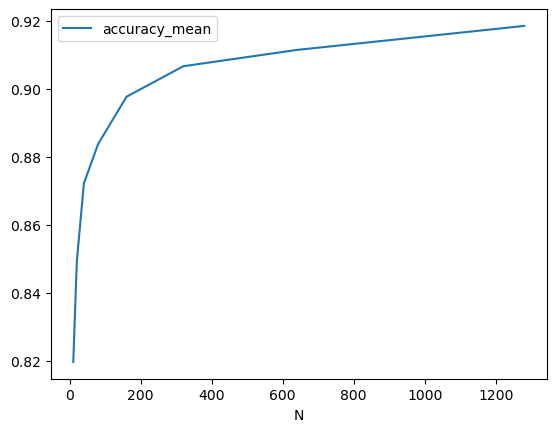

In [41]:
RBF4_N.reset_index(inplace=True)
RBF4_N.plot('N', 'accuracy_mean')

# S: 4 PCs

Import results file

In [42]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

Rot = pd.read_csv('result_hybrid_rot_SP_pca4.csv', names= colnames)

Calculate evaluation metrics

In [43]:
Rot['accuracy'] = (Rot.tp+Rot.tn)/(Rot.tp+Rot.tn+Rot.fp+Rot.fn)
Rot['jaccard'] = Rot.tp/(Rot.tp+Rot.fp + Rot.fn)
Rot['precision'] = Rot.tp/(Rot.tp+Rot.fp)
Rot['recall'] = Rot.tp/(Rot.tp+Rot.fn)
Rot['specificity'] = Rot.tn/(Rot.tn+Rot.fp)

Aggregate the metrics

In [45]:
Rot_agg = Rot.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [46]:
Rot_agg.columns  = ['_'.join(col) for col in Rot_agg.columns.values]
Rot_agg.reset_index(inplace=True)

Aggregate wrt N

In [47]:
Rot_N = Rot_agg.groupby('N').agg('mean')
Rot_N[['accuracy_mean', 'accuracy_std', 'jaccard_mean', 'precision_mean', 'recall_mean', 'specificity_mean']]

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_1837/4111368988.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Rot_N = Rot_agg.groupby('N').agg('mean')


,accuracy_mean,accuracy_std,jaccard_mean,precision_mean,recall_mean,specificity_mean
N,,,,,,
10,0.708940,0.088528,0.297651,0.531233,0.470145,0.836303
20,0.732384,0.090567,0.323334,0.544174,0.495115,0.851303
40,0.709788,0.148251,0.313545,0.527746,0.472882,0.810801
80,0.744583,0.136855,0.362700,0.549173,0.544960,0.819722
160,0.774595,0.130077,0.414330,0.572778,0.610925,0.828048
320,0.794937,0.129376,0.443506,0.582806,0.651059,0.837120
640,0.805669,0.128018,0.456730,0.593129,0.657393,0.846573
1280,0.849397,0.089074,0.496723,0.639200,0.677787,0.898096


Plot the mean overall accuracy

<AxesSubplot: xlabel='N'>

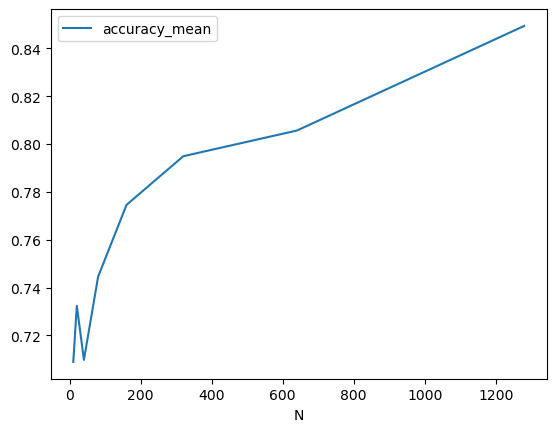

In [49]:
Rot_N.reset_index(inplace=True)
Rot_N.plot('N', 'accuracy_mean')

# WSWS: 4 PCs

Import results file

In [50]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

WSWS = pd.read_csv('result_WSWS_SP_pca4.csv', names= colnames)

Calculate evaluation metrics

In [51]:
WSWS['accuracy'] = (WSWS.tp+WSWS.tn)/(WSWS.tp+WSWS.tn+WSWS.fp+WSWS.fn)
WSWS['jaccard'] = WSWS.tp/(WSWS.tp+WSWS.fp + WSWS.fn)
WSWS['precision'] = WSWS.tp/(WSWS.tp+WSWS.fp)
WSWS['recall'] = WSWS.tp/(WSWS.tp+WSWS.fn)
WSWS['specificity'] = WSWS.tn/(WSWS.tn+WSWS.fp)

Aggregate the metrics

In [52]:
WSWS_agg = WSWS.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [54]:
WSWS_agg.columns  = ['_'.join(col) for col in WSWS_agg.columns.values]
WSWS_agg.reset_index(inplace=True)

Aggregate wrt N

In [55]:
WSWS_N = WSWS_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_1837/1549448687.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  WSWS_N = WSWS_agg.groupby('N').agg('mean')


Plot the mean overall accuracy

<AxesSubplot: xlabel='N'>

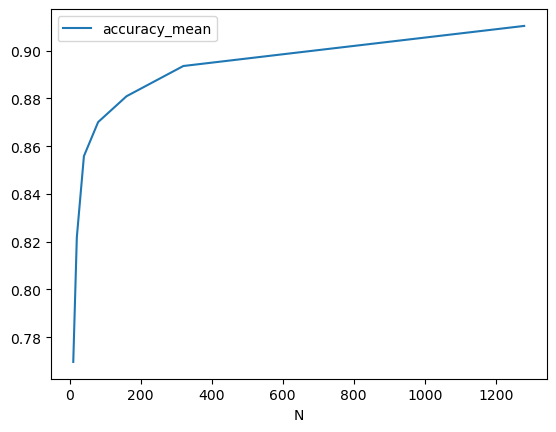

In [60]:
WSWS_N.reset_index(inplace=True)
WSWS_N.plot('N', 'accuracy_mean')

# WS: 4 PCs

Import results file

In [61]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

WS1 = pd.read_csv('result_hybrid_WS1_SP_pca4.csv', names= colnames)

Calculate evaluation metrics

In [62]:
WS1['accuracy'] = (WS1.tp+WS1.tn)/(WS1.tp+WS1.tn+WS1.fp+WS1.fn)
WS1['jaccard'] = WS1.tp/(WS1.tp+WS1.fp + WS1.fn)
WS1['precision'] = WS1.tp/(WS1.tp+WS1.fp)
WS1['recall'] = WS1.tp/(WS1.tp+WS1.fn)
WS1['specificity'] = WS1.tn/(WS1.tn+WS1.fp)

Aggregate the metrics

In [64]:
WS1_agg = WS1.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std'],
    'SV0' : ['mean'],
    'SV1' : ['mean']

})

In [74]:
WS1_agg.columns  = ['_'.join(col) for col in WS1_agg.columns.values]
WS1_agg.reset_index(inplace=True)

Aggregate wrt N

In [92]:
WS1_N = WS1_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_1837/475583216.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  WS1_N = WS1_agg.groupby('N').agg('mean')


Plot the mean overall accuracy

<AxesSubplot: xlabel='N'>

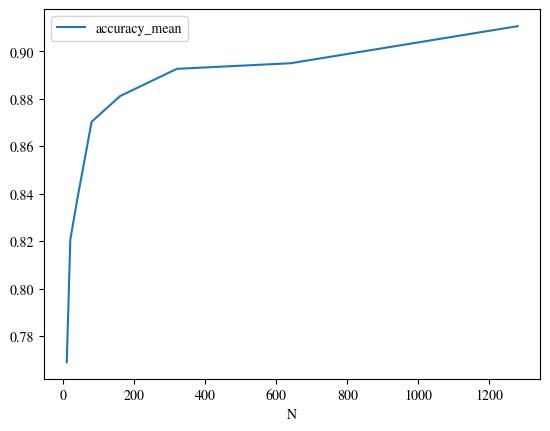

In [93]:
WS1_N.reset_index(inplace=True)
WS1_N.plot('N', 'accuracy_mean')

# SELS

Import results file

In [81]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

SELS = pd.read_csv('result_hybrid_SELS_1_SP_pca4.csv', names= colnames)

Calculate evaluation metrics

In [82]:
SELS['accuracy'] = (SELS.tp+SELS.tn)/(SELS.tp+SELS.tn+SELS.fp+SELS.fn)
SELS['jaccard'] = SELS.tp/(SELS.tp+SELS.fp + SELS.fn)
SELS['precision'] = SELS.tp/(SELS.tp+SELS.fp)
SELS['recall'] = SELS.tp/(SELS.tp+SELS.fn)
SELS['specificity'] = SELS.tn/(SELS.tn+SELS.fp)

Aggregate the metrics

In [83]:
SELS_agg = SELS.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

Aggregate wrt N

In [87]:
SELS_N = SELS_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_1837/3917772423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SELS_N = SELS_agg.groupby('N').agg('mean')


Plot the mean overall accuracy

<AxesSubplot: xlabel='N'>

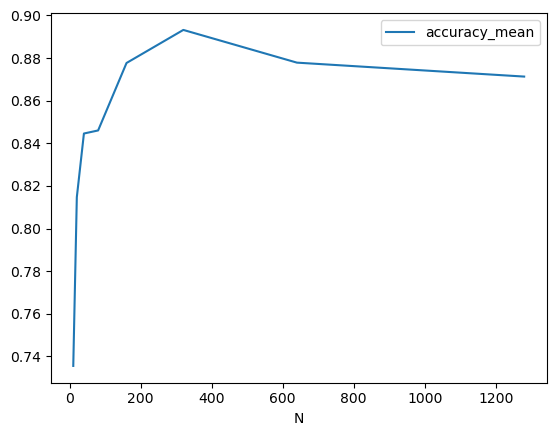

In [90]:
SELS_N.reset_index(inplace=True)
SELS_N.plot('N', 'accuracy_mean')

# Comparison

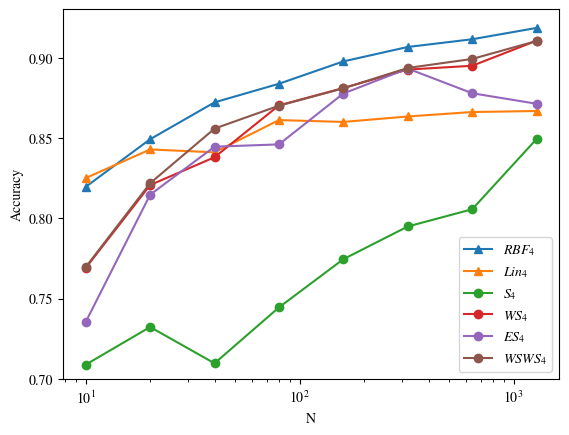

In [91]:
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

#plt.plot(RBF_N['N'], RBF_N['accuracy_mean'], marker = '^', label = "RBF")
plt.plot(RBF4_N['N'], RBF4_N['accuracy_mean'], marker = '^', label = r"$RBF_4$")
#plt.plot(lin_N['N'], lin_N['accuracy_mean'], marker = '^', label = "Lin")
plt.plot(lin4_N['N'], lin4_N['accuracy_mean'], marker = '^', label = r"$Lin_4$")
#plt.plot(WSp5_N['N'], WSp5_N['accuracy_mean'], marker = 'o', label = r"$WS^5_2$")
plt.plot(Rot_N['N'], Rot_N['accuracy_mean'], marker = 'o', label = r"$S_4$")
plt.plot(WS1_N['N'], WS1_N['accuracy_mean'], marker = 'o', label = r"$WS_4$")
plt.plot(SELS_N['N'], SELS_N['accuracy_mean'], marker = 'o', label = r"$ES_4$")
plt.plot(WSWS_N['N'], WSWS_N['accuracy_mean'], marker = 'o', label = r'$WSWS_4$')
plt.ylabel('Accuracy')
plt.xlabel('N')
plt.ylim((.7,.93))
plt.xscale('log')
plt.legend()
plt.savefig('Acc_N.png', dpi = 300, bbox_inches='tight')
plt.show()